# Visualising RGB and Lab images

---

## Imports

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
from tensorflow.keras.preprocessing.image import load_img, img_to_array

---

## Helper-function for visualising images

In [15]:
# Helper-function for visualising images

def print_RGBimage(RGBimage, img_nchannels, img_height = 'H', img_width = 'W', savefig = False, figpath = None):
    
    fig, ax = plt.subplots(1, 4, figsize = (16, 4))
    
    # Plotting main image 
    if img_nchannels == 1:
        ax[0].imshow(RGBimage[:, :, 0], cmap = plt.cm.gray)
    elif img_nchannels == 3:
        ax[0].imshow(RGBimage)
        
    ax[0].set_title("Original Image")
    ax[0].set_xlabel("W: " + str(img_width))
    ax[0].set_ylabel("H: " + str(img_height))
    ax[0].set_frame_on(False)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    
    # Plotting RGB channels
    if img_nchannels == 3:
        for i, cmap in enumerate(["Reds", "Greens", "Blues"]):
            ax[i+1].imshow(RGBimage[:, :, i], cmap = cmap)
            ax[i+1].set_title(cmap[0])
            ax[i+1].set_frame_on(False)
            ax[i+1].set_xticks([])
            ax[i+1].set_yticks([])
    
    plt.tight_layout()
    
    # Optional savefig
    if savefig:
        fig.savefig(fname = figpath)

        
def print_Labimage(Labimage, img_height = 'H', img_width = 'W', savefig = False, figpath = None):
    
    labimg_rescaled = (Labimage + [0, 128, 128]) / [100, 255, 255]
    
    fig, ax = plt.subplots(1, 4, figsize = (16, 4))
    
    ax[0].imshow(labimg_rescaled)
    ax[0].set_title("Lab Image")
    ax[0].set_xlabel("W: " + str(img_width))
    ax[0].set_ylabel("H: " + str(img_height))
    ax[0].set_frame_on(False)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    
    for i, col in enumerate(['L', 'a', 'b']):
        
        if col == 'L':
            ax[i+1].imshow(labimg_rescaled[:, :, i], cmap = plt.cm.gray)
        elif col == 'a':
            ax[i+1].imshow(labimg_rescaled[:, :, i], cmap = 'RdYlGn_r')
        elif col == 'b':
            ax[i+1].imshow(labimg_rescaled[:, :, i], cmap = 'YlGnBu_r')
            
        ax[i+1].set_title(col)
        ax[i+1].set_frame_on(False)
        ax[i+1].set_xticks([])
        ax[i+1].set_yticks([])

    plt.tight_layout()
    
    # Optional savefig
    if savefig:
        fig.savefig(fname = figpath)
    
    
def RGBimage_summary(RGBimage, savefig = False, figpath = None):

    '''Prints a summary of key information of a RGB image and
    prints the image together with is RGB breakdown. RGBimage has
    to be a Numpy array with integers ranging [0, 255].'''
    
    print("=================")
    print("RGB Image Summary")
    print("=================")
    
    RGBimg = RGBimage.astype(int)
    
    img_type = type(RGBimg)
    print(f"Object type: {img_type}")
    
    img_dim = RGBimg.shape
    img_height, img_width = img_dim[0], img_dim[1]
    print(f"Image dimensions: {img_dim}")

    img_nchannels = 1 if len(img_dim) == 2 else img_dim[-1]
    print(f"Number of channels: {img_nchannels}")
    
    if img_nchannels == 3:
        R_max, R_min = np.max(RGBimg[:, :, 0]), np.min(RGBimg[:, :, 0])
        G_max, G_min = np.max(RGBimg[:, :, 1]), np.min(RGBimg[:, :, 1])
        B_max, B_min = np.max(RGBimg[:, :, 2]), np.min(RGBimg[:, :, 2])
        
        print (f"R range: [{R_min}, {R_max}]")
        print (f"G range: [{G_min}, {G_max}]")
        print (f"B range: [{B_min}, {B_max}]")
        
    elif img_nchannels == 1:
        Gray_max, Gray_min = np.max(RGBimg), np.min(RGBimg)
        print(f"Gray range: [{Gray_min}, {Gray_max}]")

    
    # ===== Print image =====
    print_RGBimage(RGBimage = RGBimg,
                   img_nchannels = img_nchannels,
                   img_width = img_width,
                   img_height = img_height,
                   savefig = savefig,
                   figpath = figpath)
    

    
def Labimage_summary(Labimage, savefig = False, figpath = None):

    '''Prints a summary of key information of a Lab image and
    prints the image together with is RGB breakdown.'''
    
    print("=================")
    print("Lab Image Summary")
    print("=================")
    
    Labimg = Labimage
    
    img_type = type(Labimg)
    print(f"Object type: {img_type}")
    
    img_dim = Labimg.shape
    img_height, img_width, img_nchannels = img_dim[0], img_dim[1], img_dim[2]
    print(f"Image dimensions: {img_dim}")
    print(f"Number of channels: {img_nchannels}")
    
    L_max, L_min = np.max(Labimg[:, :, 0]), np.min(Labimg[:, :, 0])
    a_max, a_min = np.max(Labimg[:, :, 1]), np.min(Labimg[:, :, 1])
    b_max, b_min = np.max(Labimg[:, :, 2]), np.min(Labimg[:, :, 2])

    print (f"L range: [{L_min}, {L_max}]")
    print (f"a range: [{a_min}, {a_max}]")
    print (f"b range: [{b_min}, {b_max}]")
    
    
    # ===== Print image =====
    print_Labimage(Labimage = Labimg,
                   img_width = img_width,
                   img_height = img_height,
                   savefig = savefig,
                   figpath = figpath)

---
## Load sample images

In [13]:
silver = img_to_array(load_img(path = "Images/PokemonSilver/PokemonSilver_5987.jpg"))
blue = img_to_array(load_img(path = "Images/PokemonBlue/PokemonBlue_264.jpg", color_mode = "grayscale"))

silver_lab = rgb2lab((1.0 / 255) * silver)

---

## Use helper-functions to visualise RGB and Lab images

RGB Image Summary
Object type: <class 'numpy.ndarray'>
Image dimensions: (288, 320, 1)
Number of channels: 1
Gray range: [0, 255]


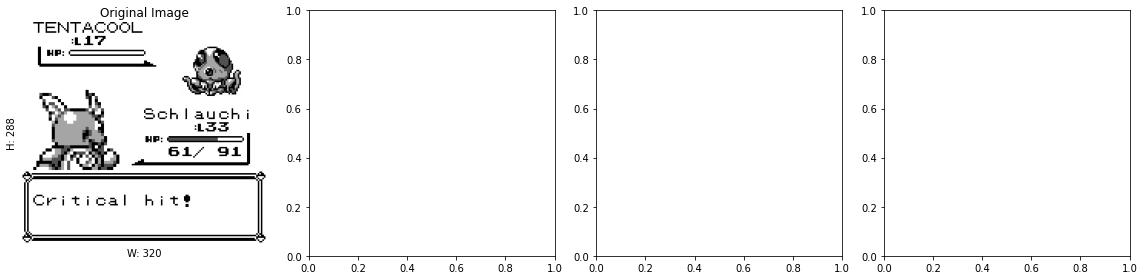

In [16]:
RGBimage_summary(blue)

RGB Image Summary
Object type: <class 'numpy.ndarray'>
Image dimensions: (288, 320, 3)
Number of channels: 3
R range: [0, 255]
G range: [0, 255]
B range: [0, 255]


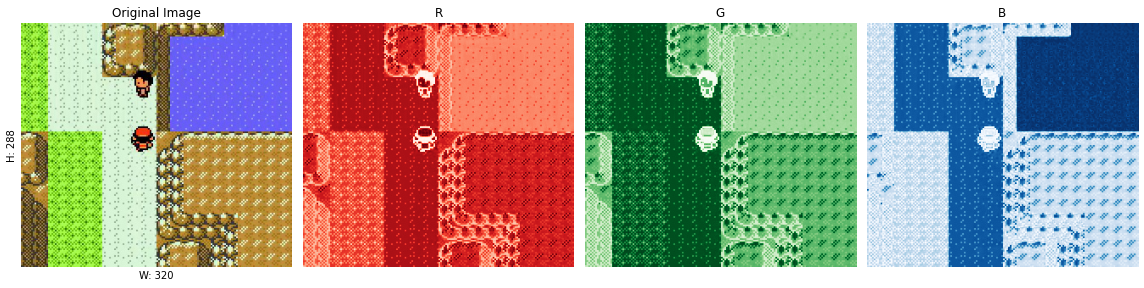

In [19]:
RGBimage_summary(silver, savefig = True, figpath = "Sample_RGB_breakdown.png")

Lab Image Summary
Object type: <class 'numpy.ndarray'>
Image dimensions: (288, 320, 3)
Number of channels: 3
L range: [0.0, 99.46569061279297]
a range: [-56.641845703125, 76.46918487548828]
b range: [-85.13257598876953, 80.87149810791016]


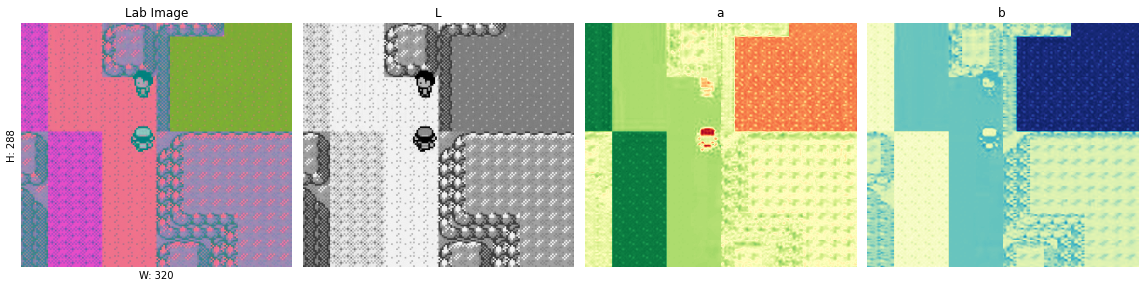

In [20]:
Labimage_summary(silver_lab, savefig = True, figpath = "Sample_Lab_breakdown.png")